<a href="https://colab.research.google.com/github/Abubakar-6818/Abubakar-6818/blob/main/Kaggle_Mental_Health_Compitetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring Mental Health Data**

**Playground Series - Season 4, Episode 11**

## Exploring Mental Health Data

### Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Depression Survey/Dataset for Analysis dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

**Notes:**

* A number of data artifacts have been left in the synthetic dataset.
* This is not a particularly difficult dataset to model. It may be interesting to focus on different ways to visualize the dataset.

### Files

* **train.csv:** The training dataset; `class` is the binary target (either `e` or `p`)
* **test.csv:** The test dataset; your objective is to predict the target `class` for each row
* **sample_submission.csv:** A sample submission file in the correct format

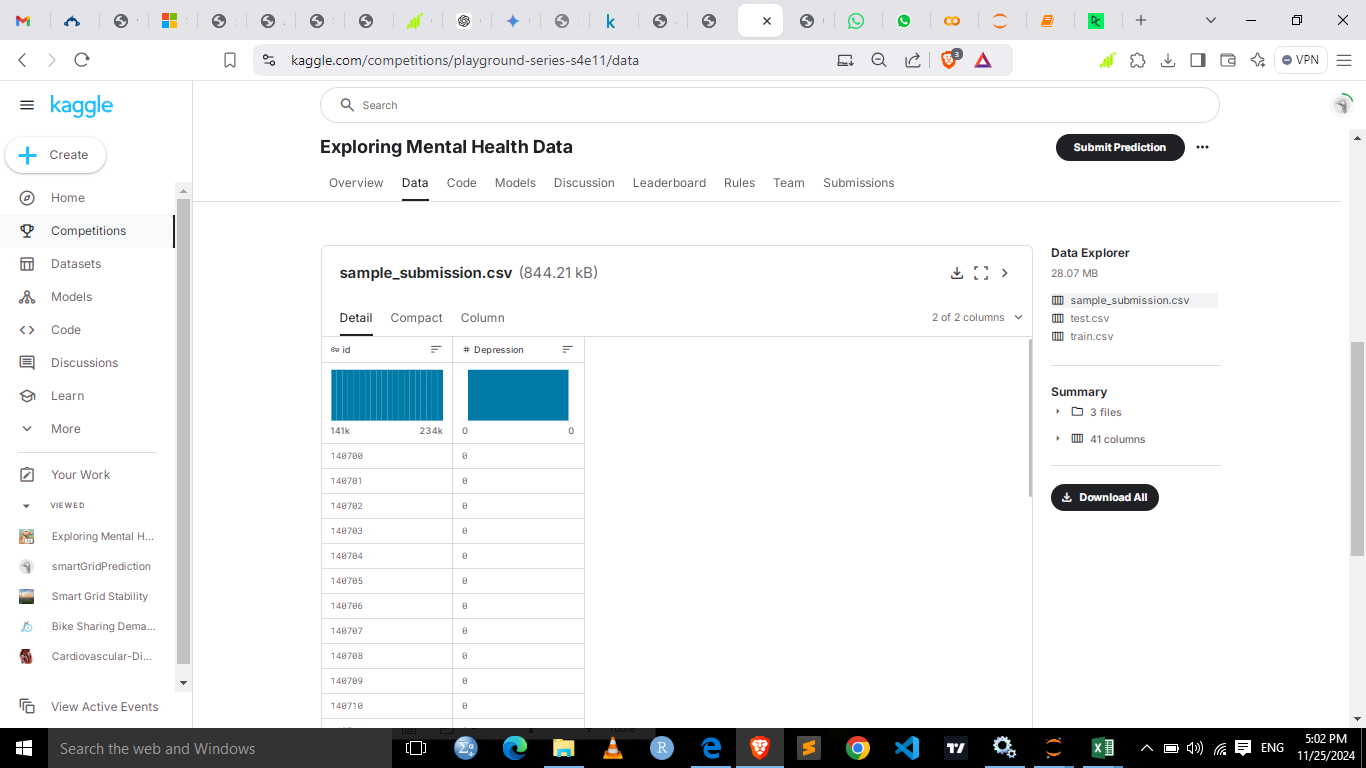

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
train_data = pd.read_csv('train.csv')
train_data.head(10)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0.0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0.0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0.0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.90,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0.0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0.0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36137 entries, 0 to 36136
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     36137 non-null  int64  
 1   Name                                   36136 non-null  object 
 2   Gender                                 36136 non-null  object 
 3   Age                                    36136 non-null  float64
 4   City                                   36136 non-null  object 
 5   Working Professional or Student        36136 non-null  object 
 6   Profession                             26699 non-null  object 
 7   Academic Pressure                      7189 non-null   float64
 8   Work Pressure                          28943 non-null  float64
 9   CGPA                                   7190 non-null   float64
 10  Study Satisfaction                     7188 non-null   float64
 11  Jo

In [7]:
# fill the missing values with "mean" of the numerical columns and  with "mode" for categorical columns in the train_data dataframe

# Fill numerical missing values with the mean
for col in train_data.select_dtypes(include=np.number):
    train_data[col] = train_data[col].fillna(train_data[col].mean())

# Fill categorical missing values with the mode
for col in train_data.select_dtypes(exclude=np.number):
    train_data[col] = train_data[col].fillna(train_data[col].mode()[0])

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36137 entries, 0 to 36136
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     36137 non-null  int64  
 1   Name                                   36137 non-null  object 
 2   Gender                                 36137 non-null  object 
 3   Age                                    36137 non-null  float64
 4   City                                   36137 non-null  object 
 5   Working Professional or Student        36137 non-null  object 
 6   Profession                             36137 non-null  object 
 7   Academic Pressure                      36137 non-null  float64
 8   Work Pressure                          36137 non-null  float64
 9   CGPA                                   36137 non-null  float64
 10  Study Satisfaction                     36137 non-null  float64
 11  Jo

In [9]:
train_data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,3.13938,5.000000,7.685707,2.930579,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.13938,4.000000,7.685707,2.930579,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,5.00000,2.994817,8.970000,2.000000,2.971324,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.13938,5.000000,7.685707,2.930579,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.13938,1.000000,7.685707,2.930579,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [10]:
# Round the 'GPA' column to 2 decimal places
train_data['CGPA'] = train_data['CGPA'].round(2)

train_data.head(5)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,3.13938,5.000000,7.69,2.930579,2.000000,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,3.13938,4.000000,7.69,2.930579,3.000000,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,Teacher,5.00000,2.994817,8.97,2.000000,2.971324,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,3.13938,5.000000,7.69,2.930579,1.000000,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,3.13938,1.000000,7.69,2.930579,1.000000,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0


In [11]:
train_data["Working Professional or Student"].unique()

array(['Working Professional', 'Student'], dtype=object)

In [12]:
#create a one hot encoding for the categorical columns

# Create a copy of the dataframe to avoid modifying the original
train_data_encoded = train_data.copy()

# Identify categorical columns
categorical_cols = train_data_encoded.select_dtypes(exclude=np.number).columns

# Perform one-hot encoding
train_data_encoded = pd.get_dummies(train_data_encoded, columns=categorical_cols, drop_first=True)

# Display the encoded dataframe
train_data_encoded.head()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,...,Degree_Nalini,Degree_P.Com,Degree_P.Pharm,Degree_PhD,Degree_S.Tech,Degree_UX/UI Designer,Degree_Unite,Degree_Veda,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,0,49.0,3.13938,5.000000,7.69,2.930579,2.000000,1.0,2.0,0.0,...,False,False,False,False,False,False,False,False,False,False
1,1,26.0,3.13938,4.000000,7.69,2.930579,3.000000,7.0,3.0,1.0,...,False,False,False,False,False,False,False,False,True,False
2,2,33.0,5.00000,2.994817,8.97,2.000000,2.971324,3.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,False
3,3,22.0,3.13938,5.000000,7.69,2.930579,1.000000,10.0,1.0,1.0,...,False,False,False,False,False,False,False,False,True,True
4,4,30.0,3.13938,1.000000,7.69,2.930579,1.000000,9.0,4.0,0.0,...,False,False,False,False,False,False,False,False,True,True


In [13]:
!pip install autogluon.tabular[all]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 109.1

In [14]:
#Train a model using AutoGluon’s Tabular Prediction


from autogluon.tabular import TabularPredictor

# Assuming 'train_data_encoded' DataFrame is already prepared as in the previous code
ignore_columns = ["Name"]

# Separate features (X) and target variable (y)
X = train_data_encoded.drop(columns=['Depression'])
y = train_data_encoded['Depression']

# Split the data into training and validation sets (optional, but recommended)
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Example split, adjust as needed

# Create and train the TabularPredictor
# Removed the 'label' argument from the fit method
predictor = TabularPredictor(label='Depression', eval_metric='root_mean_squared_error',
                             learner_kwargs = {"ignored_columns": ignore_columns}).fit(
    train_data=train_data_encoded, tuning_data=None, time_limit=600, presets='best_quality'
    # Pass the entire dataframe (train_data_encoded) here
)


# Get predictions on the validation set (optional)
# y_pred = predictor.predict(X_val)

# Evaluate the model (optional, if you have a validation set)
# performance = predictor.evaluate_predictions(y_true=y_val, y_pred=y_pred, auxiliary_metrics=True)
# print(performance)


# You can now use the trained predictor to make predictions on new data
# new_data = ...  # Load your new data
# predictions = predictor.predict(new_data)

No path specified. Models will be saved in: "AutogluonModels/ag-20241125_153527"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.41 GB / 12.67 GB (90.0%)
Disk Space Avail:   71.22 GB / 112.64 GB (63.2%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

In [16]:

# Preprocess the test data similarly to the training data

# Fill numerical missing values with the mean from the training data
for col in test_data.select_dtypes(include=np.number):
    test_data[col] = test_data[col].fillna(train_data[col].mean())

# Fill categorical missing values with the mode from the training data
for col in test_data.select_dtypes(exclude=np.number):
    test_data[col] = test_data[col].fillna(train_data[col].mode()[0])

# Round the 'CGPA' column
test_data['CGPA'] = test_data['CGPA'].round(2)

# One-hot encode the categorical features in the test set, aligning with the training set
test_data_encoded = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Ensure the test data has the same columns as the training data after one-hot encoding
missing_cols = set(train_data_encoded.columns) - set(test_data_encoded.columns)
for c in missing_cols:
    test_data_encoded[c] = 0
test_data_encoded = test_data_encoded[train_data_encoded.columns]


# Now you can make predictions on the preprocessed test data
predictions = predictor.predict(test_data_encoded.drop(columns=['Depression']))

predictions

,Depression
0,-0.007636
1,-0.003416
2,0.042620
3,1.033872
4,0.026461
...,...
93795,-0.002421
93796,0.855444
93797,-0.006456
93798,0.836188


In [17]:
if (predictions < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")

The Series contains negative values.


In [18]:

predictions = predictor.predict(test_data_encoded.drop(columns=['Depression']))

# Rounding Logic
predictions = predictions.apply(lambda x: 0 if x < 0 else (1 if x <= 0.70 else (1 if x > 1 else x)))

predictions
if (predictions < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")

The Series does not contain negative values.


In [19]:
predictions

,Depression
0,0.000000
1,0.000000
2,1.000000
3,1.000000
4,1.000000
...,...
93795,0.000000
93796,0.855444
93797,0.000000
93798,0.836188


In [21]:
# convert values <= 0.75 to "1" and values >0.75 to "0"



predictions = predictor.predict(test_data_encoded.drop(columns=['Depression']))

# Convert values based on the specified criteria
predictions = predictions.apply(lambda x: 1 if x <= 0.75 else 0)

predictions

,Depression
0,1
1,1
2,1
3,0
4,1
...,...
93795,1
93796,0
93797,1
93798,0


In [23]:

# Check for negative values
if (predictions < 0).any():
    print("The Series contains negative values.")
else:
    print("The Series does not contain negative values.")

# Check for decimal values
if not all(predictions.apply(lambda x: isinstance(x, int))):
    print("The Series contains decimal values.")
else:
    print("The Series does not contain decimal values.")


# Check for values greater than 1
if (predictions > 1).any():
    print("The Series contains values greater than 1.")
else:
    print("The Series does not contain values greater than 1.")

The Series does not contain negative values.
The Series does not contain decimal values.
The Series does not contain values greater than 1.


In [32]:
summary_dict = predictor.fit_summary()


*** Summary of fit() ***
Estimated performance of each model:
                    model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0     WeightedEnsemble_L3  -0.215734  root_mean_squared_error       8.821287  366.536190                0.000740           0.036228            3       True          7
1     WeightedEnsemble_L2  -0.215734  root_mean_squared_error       8.821324  366.535727                0.000776           0.035765            2       True          6
2         LightGBM_BAG_L1  -0.216612  root_mean_squared_error       0.947510   27.123883                0.947510          27.123883            1       True          4
3       LightGBMXT_BAG_L1  -0.217849  root_mean_squared_error       1.158560   27.908156                1.158560          27.908156            1       True          3
4  RandomForestMSE_BAG_L1  -0.225782  root_mean_squared_error       6.714478  311.467922               

In [25]:
# Evaluate the model accuracy with test data

import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# ... (Your existing code)

predictions = predictor.predict(test_data_encoded.drop(columns=['Depression']))

# Assuming 'test_data_encoded' contains the 'Depression' column with the true labels
y_test = test_data_encoded['Depression']

# Convert predictions to integers (0 or 1) if they are not already integers
predictions = predictions.astype(int)


# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.9736034115138593


In [31]:
#Create a leader board table for the models

leaderboard = predictor.leaderboard(test_data_encoded)
leaderboard

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,-0.000000,-0.329966,root_mean_squared_error,0.363787,0.251619,0.146560,0.363787,0.251619,0.146560,1,True,2
1,KNeighborsUnif_BAG_L1,-0.000000,-0.330729,root_mean_squared_error,0.522000,0.223394,0.150981,0.522000,0.223394,0.150981,1,True,1
2,RandomForestMSE_BAG_L1,-0.358932,-0.225782,root_mean_squared_error,4.485917,6.714478,311.467922,4.485917,6.714478,311.467922,1,True,5
3,LightGBMXT_BAG_L1,-0.363807,-0.217849,root_mean_squared_error,10.405643,1.158560,27.908156,10.405643,1.158560,27.908156,1,True,3
4,WeightedEnsemble_L3,-0.365061,-0.215734,root_mean_squared_error,22.895330,8.821287,366.536190,0.003178,0.000740,0.036228,3,True,7
5,WeightedEnsemble_L2,-0.365061,-0.215734,root_mean_squared_error,22.896190,8.821324,366.535727,0.004037,0.000776,0.035765,2,True,6
6,LightGBM_BAG_L1,-0.368961,-0.216612,root_mean_squared_error,8.000593,0.947510,27.123883,8.000593,0.947510,27.123883,1,True,4


In [26]:
#  zipping AutogluonModels file

!zip -r /content/AutogluonModels.zip /content/AutogluonModels


  adding: content/AutogluonModels/ (stored 0%)
  adding: content/AutogluonModels/ag-20241125_153527SummaryOfModels.html (deflated 74%)
  adding: content/AutogluonModels/ag-20241125_153527/ (stored 0%)
  adding: content/AutogluonModels/ag-20241125_153527/models/ (stored 0%)
  adding: content/AutogluonModels/ag-20241125_153527/models/RandomForestMSE_BAG_L1/ (stored 0%)
  adding: content/AutogluonModels/ag-20241125_153527/models/RandomForestMSE_BAG_L1/utils/ (stored 0%)
  adding: content/AutogluonModels/ag-20241125_153527/models/RandomForestMSE_BAG_L1/utils/oof.pkl (deflated 71%)
  adding: content/AutogluonModels/ag-20241125_153527/models/RandomForestMSE_BAG_L1/utils/model_template.pkl (deflated 45%)
  adding: content/AutogluonModels/ag-20241125_153527/models/RandomForestMSE_BAG_L1/S1F1/ (stored 0%)
  adding: content/AutogluonModels/ag-20241125_153527/models/RandomForestMSE_BAG_L1/S1F1/model.pkl (deflated 81%)
  adding: content/AutogluonModels/ag-20241125_153527/models/RandomForestMSE_BAG

In [33]:
predictions

,Depression
0,0
1,0
2,0
3,1
4,0
...,...
93795,0
93796,0
93797,0
93798,0


In [36]:
id = test_data_encoded['id']
# Same submitting predictions
submission_Mental_Health = pd.DataFrame({'id':id,'Despression':predictions}, columns = ['id','Despression'])

submission_Mental_Health.to_csv("submission_Mental_Health.csv", index=False)

In [37]:
submission_Mental_Health.head()

,id,Despression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
